In [25]:
import pandas as pd
import os
WORKSPACE = '/Users/houtonglei/OneDrive - stu.hqu.edu.cn/数学建模/2021美赛/'
DATASET_PATH = WORKSPACE + '2021_ICM_ProblemC/txt_data'
DATASET_DESCRIPTION = WORKSPACE + '2021_ICM_ProblemC/2021MCM_ProblemC_DataSet.xlsx'
dataset_description = pd.read_excel(DATASET_DESCRIPTION)

In [34]:
# 步骤1：载入训练数据
from sklearn.datasets import load_files
data_folder = '/Users/houtonglei/OneDrive - stu.hqu.edu.cn/数学建模/2021美赛/2021_ICM_ProblemC/txt_dataset/'
train_set = load_files(data_folder+'train', shuffle=False)
print("n_samples of train_set: %d" % len(train_set.data))

n_samples of train_set: 3839


In [27]:
# 步骤2：将文档数据转化为a
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_set.data)
print(vectorizer.get_feature_names())
print(X.shape)

['00', '0038', '00am', '00pm', '07', '08', '09', '0930', '0ave', '10', '100', '109', '11', '11520', '11900', '12', '1211', '123', '1231', '12th', '13048', '14', '1445', '14ft', '15', '150', '15pm', '15th', '16', '17', '173rd', '18', '18322', '184th', '1890', '18th', '195', '19mm', '19th', '1and', '1st', '20', '200', '2013', '2015', '2018', '2019', '2020', '206', '2102', '213', '22', '220', '23', '231', '24', '24oz', '25', '255', '25th', '26', '26th', '27', '27th', '28', '29', '2in', '2inch', '2inches', '2nd', '2pm', '2x4', '2xs', '30', '300th', '30mph', '30pm', '30th', '3209', '32nd', '35', '35mph', '360', '36th', '37', '38', '396815', '39th', '3rd', '40', '408', '415pm', '4204', '4210', '425', '4307', '4387', '45', '4594', '45th', '46', '48', '4th', '4x', '4x4', '50', '501', '509', '5096693002', '53', '531', '55', '5827', '58th', '5in', '5inches', '5pm', '5second', '60', '600', '60s', '630', '65', '660139', '6ft', '6th', '70', '706', '75', '750', '7713', '78', '7am', '80', '8176', '84

X.toarray()= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
tfidf.toarray()= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


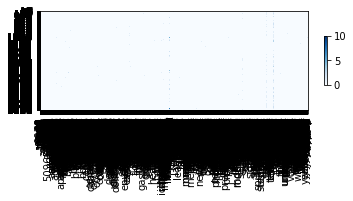

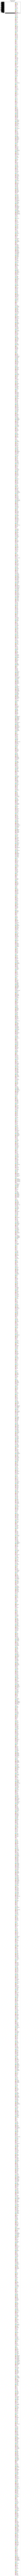

KeyboardInterrupt: 

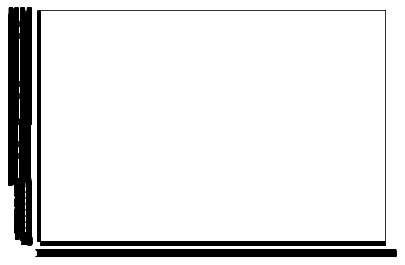

In [35]:
# coding:utf-8
import pylab
from matplotlib import cm
from numpy import matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#文本词频可视化图表stackplot风格
# streamgraph风格的在beaborn上也有，不过不太符合要求
# streamgraph风格的在pyechart上也有，可以直接使用，下次再讲用法
# streamgraph风格的在matplotlib上只有类stackplot，不够圆滑
def draw_stackplot(data,xlabels,ylabels):
    # X标签 行，即章节
    # Y标签 列，即词汇
    # 数据 即词频，需要转置后才能应用
    #data= [[0, 3, 3, 3, 0, 0, 3, 0, 3], [0, 3, 0, 3, 0, 6, 3, 0, 3], [3, 0, 0, 0, 3, 0, 3, 3, 0], [0, 3, 3, 3, 0, 0, 3, 0, 3]]
    #xlablels= range(0, 4)
    #ylablels= ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
    pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']  # 防止中文乱码
    pylab.mpl.rcParams['axes.unicode_minus'] = False  # 防止中文乱码
    fig, ax = plt.subplots()
    ax.stackplot(xlabels, data, labels=ylabels, baseline='wiggle')
    ax.axes.set_yticks(range(len(ylabels)))
    ax.axes.set_yticklabels(ylabels)
    ax.axes.set_xticks(range(len(xlabels)))
    ax.axes.set_xticklabels(xlabels)
    ax.legend(loc='best')
    ax.set_title('Interesting Graph\nCheck it out')
    plt.show()

#文本词频可视化图表heatmap风格
def draw_heatmap(data, xlabels, ylabels):
    pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']  # 防止中文乱码
    pylab.mpl.rcParams['axes.unicode_minus'] = False  # 防止中文乱码
    vmin=np.amin(matrix(data))
    vmax = np.amax(matrix(data))
    cmap = cm.Blues
    figure = plt.figure(facecolor='w')
    ax = figure.add_subplot(2, 1, 1, position=[0.1, 0.15, 0.8, 0.8])
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels)
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)
    map = ax.imshow(data, interpolation='nearest', cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
    cb = plt.colorbar(mappable=map, cax=None, ax=None, shrink=0.5)
    plt.xticks(rotation=90)  # 将字体进行旋转
    plt.yticks(rotation=360)
    plt.show()

# -------------------------词频分析---------------------------
#将文本中的词语转换为词频矩阵
vectorizer = CountVectorizer()
#计算个词语出现的次数
X = vectorizer.fit_transform(train_set.data)
#X格式如下，主要包括（行 词）词频
#(0, 1)    1     (0, 2)   1     (0, 6)   1     (0, 3)   1     (0, 8)   1     (1, 5)   2     (1, 1)   1
#获取语句中所有文本关键词
word = vectorizer.get_feature_names()
# word格式如下，是个英文词汇的数组列表
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
#查看词频结果，转置为Numpy 2维数组后的输出
print('X.toarray()=',X.toarray())
#and   document   first  is one    second the    third  this
#0 1  1  1  0  0  1  0  1
#0 1  0  1  0  2  1  0  1
#1 0  0  0  1  0  1  1  0
#0 1  1  1  0  0  1  0  1
# ---------------------------可视化----------------------------
#热力图方式
xlabels=word
ylabels=list(range(len(train_set.data)))
data=X.toarray().tolist()
draw_heatmap(data, xlabels, ylabels)
#转置维stackflow的格式要求，y轴为字符，x轴为章节
#stackplt方式
data=X.T.toarray().tolist()
draw_stackplot(data, ylabels, xlabels)
# --------------------------词频分析---------------------------
#TfidfTransformer类调用
transformer = TfidfTransformer()
#将词频矩阵X统计成TF-IDF值
tfidf = transformer.fit_transform(X)
#查看数据结构 tfidf[i][j]表示i类文本中的tf-idf权重,以下为fidf的输出样式
#(0, 8)    0.4387767428592343
#(0, 3)    0.4387767428592343
#(0, 6)    0.35872873824808993
#(0, 2)    0.5419765697264572
#(0, 1)    0.4387767428592343
#(1, 8)    0.27230146752334033
#(1, 3)    0.27230146752334033
print('tfidf.toarray()=',tfidf.toarray())
#查看tfidf结果，转置为Numpy 2维数组后的输出
#and   document   first  is one    second the    third  this
#0 0.43877674 0.54197657 0.43877674 0  0  0.35872874 0  0.43877674
#0 0.27230147 0  0.27230147 0  0.85322574 0.22262429 0  0.27230147
#0.55280532    0  0  0  0.55280532 0  0.28847675 0.55280532 0
#0 0.43877674 0.54197657 0.43877674 0  0  0.35872874 0  0.43877674
# ---------------------------可视化----------------------------
xlabels=word
ylabels=range(len(train_set.data))
data=tfidf.toarray().tolist()
draw_heatmap(data, xlabels, ylabels)  # 第四类文本的切词结果
# -------------------------词频分析---------------------------
# 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(train_set.data)
word = vectorizer.get_feature_names()
print(X.toarray())
#['中国', '北京', '大厦', '天安门', '小明', '来到', '杭研', '毕业', '清华大学', '硕士', '科学院', '网易']
#[0 1 0 0 0 1 0 0 1 0 0 0]
#[0 0 1 0 0 1 1 0 0 0 0 1]
#[1 0 0 0 1 0 0 1 0 1 1 0]
#[0 1 0 1 0 0 0 0 0 0 0 0]
# ---------------------------可视化----------------------------
xlabels=word
ylabels=range(len(train_set.data))
data=X.toarray().tolist()
print('--------------')

print('--------------')
# --------------------------词频分析---------------------------
# 该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()
# 第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(X)
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()
# 将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
data = tfidf.toarray()
# ---------------------------可视化----------------------------
xlabels=word
ylabels=range(len(train_set.data))
data=tfidf.toarray().tolist()
draw_heatmap(data, xlabels, ylabels)
#['中国', '北京', '大厦', '天安门', '小明', '来到', '杭研', '毕业', '清华大学', '硕士', '科学院', '网易']
#[0.         0.52640543 0.         0.         0.         0.52640543  0.         0.         0.66767854 0.         0.         0.        ]
#[0.         0.         0.52547275 0.         0.         0.41428875 0.52547275 0.         0.         0.         0.         0.52547275]
#[0.4472136  0.         0.         0.         0.4472136  0. 0.         0.4472136  0.         0.4472136  0.4472136  0.        ]
#[0.         0.6191303  0.         0.78528828 0.         0. 0.         0.         0.         0.         0.         0.        ]
for i in range(len(data)):  # 打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
    print( u"-------这里输出第", i, u"类文本的词语tf-idf权重------")
    for j in range(len(word)):
        print(word[j], data[i][j])


In [28]:
# 步骤3：使用多项式分布的朴素贝叶斯算法训练
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve
clf = MultinomialNB()
train_sizes,train_scores,test_scores,fit_times,score_times = learning_curve(clf,X, train_set.target, n_jobs=12, return_times=True)
clf.fit(X, train_set.target)

MultinomialNB()

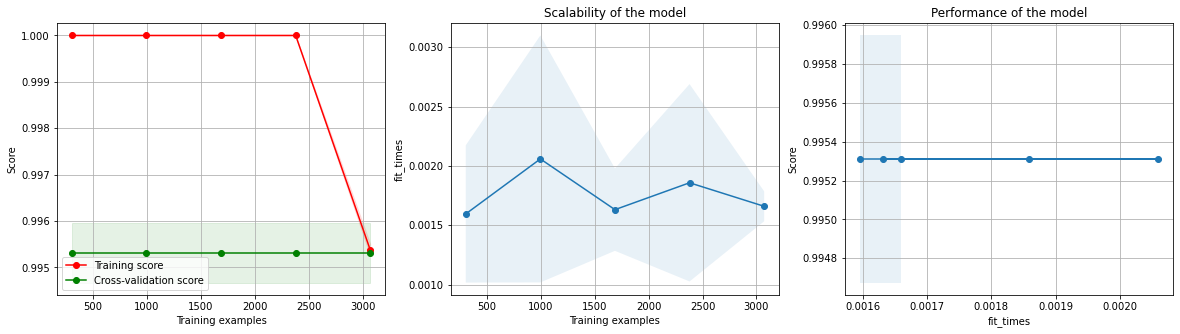

In [29]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")

plt.show()
_.savefig('NC.svg',dpi=600)


In [30]:
path = []
for p in train_set.filenames:
    path.append(os.path.split(p)[1].split('_')[0])

train_proba = clf.predict_proba(X)
pd.DataFrame(train_proba,index=path,columns=train_set.target_names).to_csv('result/n&c_embedding.csv', float_format='%.16f')

sum_file = pd.read_csv('result/sum_train.csv', index_col=0)
for i,p in enumerate(path):
    sum_file.loc[p,'nc_pos'] = train_proba[i, 1]
sum_file.to_csv('result/sum_train.csv', float_format='%.16f')

In [31]:
test_set = load_files(data_folder+'test', shuffle=False)
print("n_samples of test_set: %d" % len(test_set.data))

n_samples of test_set: 2332


In [32]:
# 步骤5:把测试数据集向量化
X_val = vectorizer.transform(test_set.data)
print("n_samples: %d, n_features: %d" % X_val.shape)

n_samples: 2332, n_features: 3457


In [33]:
path = []
for p in test_set.filenames:
    path.append(os.path.split(p)[1].split('_')[0])

pred_proba = clf.predict_proba(X_val)
pd.DataFrame(pred_proba,index=path,columns=train_set.target_names).to_csv('result/n&c_result.csv', float_format='%.16f')

sum_file = pd.read_csv('result/sum_test.csv', index_col=0)
for i,p in enumerate(path):
    sum_file.loc[p,'nc_pos'] = train_proba[i, 1]
sum_file.to_csv('result/sum_test.csv', float_format='%.16f')